# Daniel's Scratchpad

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
# This code will give you the zip code from the address column
df['address'][23910][-20:-15]

'98023'

In [5]:
zip_ = []
for add in df['address']:
    zip_.append(add[-20:-15])

df['zip'] = zip_

In [6]:
# THERE IS DATA FROM OTHER CITIES MIXED IN HERE - WE'LL NEED TO CLEAN THIS
# PRINCETON, MASSACHUSETTS IS NOT IN KING COUNTY, WASHINGTON  --  EXAMPLE BELOW
df.loc[df['zip'] == '01541']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
16906,1959700246,8/9/2021,1050000.0,3,2.5,1500,1167,2.0,NO,NO,...,1020,480,0,200,2011,0,"Boylston Avenue, Princeton, Massachusetts 0154...",42.44778,-71.8807,01541
26129,9831200171,5/25/2022,1515000.0,3,2.5,1880,1350,3.0,NO,NO,...,1880,850,850,0,2013,0,"Boylston Avenue, Princeton, Massachusetts 0154...",42.44778,-71.8807,01541


In [7]:
# Removing addresses not in King County, Washington -- we sourced this list of zips online
df = df[df['address'].str.contains('98001|98002|98003|98004|98005|98006|98007|98008|98009|98010|98011|98013|98014|98015|98019|98022|98023|98024|98025|98027|98028|98029|98030|98031|98032|98033|98034|98035|98038|98039|98040|98041|98042|98045|98047|98050|98051|98052|98053|98054|98055|98056|98057|98058|98059|98062|98063|98064|98065|98068|98070|98071|98072|98073|98074|98075|98077|98083|98092|98093|98101|98102|98103|98104|98105|98106|98107|98108|98109|98111|98112|98114|98115|98116|98117|98118|98119|98121|98122|98124|98125|98126|98131|98132|98133|98134|98136|98138|98144|98145|98146|98148|98154|98155|98158|98160|98161|98164|98166|98168|98171|98174|98177|98178|98188|98198|98199|98224|98288')]

In [8]:
df['zip'] = df['zip'].astype(int)

In [9]:
# Creating median home price by zip code
zipdf = df.groupby('zip')['price'].median()
zipdf[98133]

765000.0

In [10]:
# creating row in df for the median home price for the zip code
median_home_price = []

for zip_ in df['zip']:
    median_home_price.append(zipdf[zip_])

df['median_home_price'] = median_home_price

In [11]:
# NOTE: heat_source and sewer_system have missing values per below
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29189 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29189 non-null  int64  
 1   date               29189 non-null  object 
 2   price              29189 non-null  float64
 3   bedrooms           29189 non-null  int64  
 4   bathrooms          29189 non-null  float64
 5   sqft_living        29189 non-null  int64  
 6   sqft_lot           29189 non-null  int64  
 7   floors             29189 non-null  float64
 8   waterfront         29189 non-null  object 
 9   greenbelt          29189 non-null  object 
 10  nuisance           29189 non-null  object 
 11  view               29189 non-null  object 
 12  condition          29189 non-null  object 
 13  grade              29189 non-null  object 
 14  heat_source        29160 non-null  object 
 15  sewer_system       29176 non-null  object 
 16  sqft_above         291

In [12]:
# sns.pairplot(df)

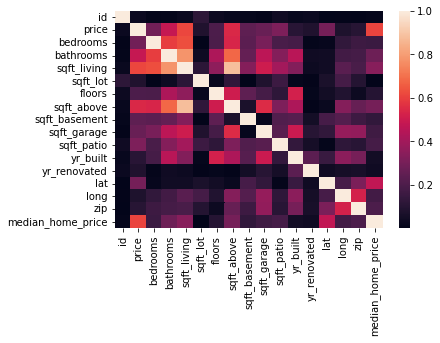

In [13]:
sns.heatmap(abs(df.corr()));

In [14]:
# price has a decent correlation with sqft_living, bathrooms, sqft_above, bedrooms

In [15]:
df['yr_old'] = 2023 - df['yr_built']

In [16]:
df['yr_since_reno'] = 2023 - df['yr_renovated']

In [17]:
# REPLACING COLUMNS WITH NUMBER DATA FOR ORDINAL DATA
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '1 Cabin', '2 Substandard'], dtype=object)

In [18]:
df['grade_val'] = df['grade'].replace(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion', '3 Poor', '1 Cabin', '2 Substandard'], 
        [7, 9, 8, 6, 10, 5, 11, 12, 4, 13, 3, 1, 2])

In [19]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [20]:
df['waterfront_val'] = df['waterfront'].replace(['NO', 'YES'], [0, 1])

In [21]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [22]:
df['condition_val'] = df['condition'].replace(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], [1, 2, 3, 4, 5])

In [23]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [24]:
df['view_val'] = df['view'].replace(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], [0, 1, 2, 3, 4])

In [25]:
# I got this data from https://www.point2homes.com/US/Neighborhood/WA/King-County-Demographics.html
# This data was sourced through the US Census Bureau via 'Point2Homes'
df2 = pd.read_csv('data/King County Pop Income Info.csv')

In [26]:
df2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,ZipCode,Population,Number of Households,Median Income,Average Income,NaN
1,NaN,98001,"35,297","11,820","$95,605.00","$116,400.00",NaN
2,NaN,98002,"35,915","14,012","$59,742.00","$72,627.00",NaN
3,NaN,98003,"50,501","18,988","$63,289.00","$79,484.00",NaN
4,NaN,98004,"38,632","18,125","$154,403.00","$225,776.00",NaN


In [27]:
# Assign row as column headers
header_row = 0
df2.columns = df2.iloc[header_row]

# Convert row to column header using DataFrame.iloc[]
df2.columns = df2.iloc[0]

# Dropping first row
df2 = df2.iloc[1:]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 1 to 83
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nan                   0 non-null      float64
 1   ZipCode               83 non-null     object 
 2   Population            83 non-null     object 
 3   Number of Households  83 non-null     object 
 4   Median Income         83 non-null     object 
 5   Average Income        83 non-null     object 
 6   nan                   0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 4.7+ KB


In [28]:
df2 = df2.set_index('ZipCode')

In [29]:
df2['Median Income'] = df2['Median Income'].str.replace(',', '')
df2['Median Income'] = df2['Median Income'].str.replace('$', '')
df2['Median Income'] = df2['Median Income'].astype(float)
df2 = df2.dropna(axis=1)

In [30]:
df3 = df2.loc['98001']
df3['Median Income']

95605.0

In [31]:
df2

,Population,Number of Households,Median Income,Average Income
ZipCode,,,,
98001,"35,297","11,820",95605.0,"$116,400.00"
98002,"35,915","14,012",59742.0,"$72,627.00"
98003,"50,501","18,988",63289.0,"$79,484.00"
98004,"38,632","18,125",154403.0,"$225,776.00"
98005,"21,603","8,732",145152.0,"$192,522.00"
...,...,...,...,...
98195,"2,259",0,0.0,$0.00
98198,"38,919","14,376",69833.0,"$94,390.00"
98199,"22,890","10,186",148878.0,"$183,575.00"


In [32]:
# creating an index list from df2 that contains list of zip codes in our data
index_list = df2.index.values.tolist()

In [33]:
# creating row in df for the median income for the zip code - this is to see if the median income affects price
median_inc = []

for zip_ in df['zip']:
    y = str(zip_)
    if y in index_list:
        x = df2.loc[y]
        median_inc.append(x['Median Income'])
    else:
        median_inc.append('NaN')

df['median_zip_income'] = median_inc

In [34]:
# creating column in df for population by zip code - this is to see if the population of a zip code affects price
zip_pop = []

for zip_ in df['zip']:
    y = str(zip_)
    if y in index_list:
        x = df2.loc[y]
        zip_pop.append(x['Population'])
    else:
        zip_pop.append('NaN')

df['zip_population'] = zip_pop
df['zip_population'] = df['zip_population'].str.replace(',', '')
df['zip_population'] = df['zip_population'].astype(float)
df = df.dropna(axis=0)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29147 entries, 0 to 30154
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29147 non-null  int64  
 1   date               29147 non-null  object 
 2   price              29147 non-null  float64
 3   bedrooms           29147 non-null  int64  
 4   bathrooms          29147 non-null  float64
 5   sqft_living        29147 non-null  int64  
 6   sqft_lot           29147 non-null  int64  
 7   floors             29147 non-null  float64
 8   waterfront         29147 non-null  object 
 9   greenbelt          29147 non-null  object 
 10  nuisance           29147 non-null  object 
 11  view               29147 non-null  object 
 12  condition          29147 non-null  object 
 13  grade              29147 non-null  object 
 14  heat_source        29147 non-null  object 
 15  sewer_system       29147 non-null  object 
 16  sqft_above         291

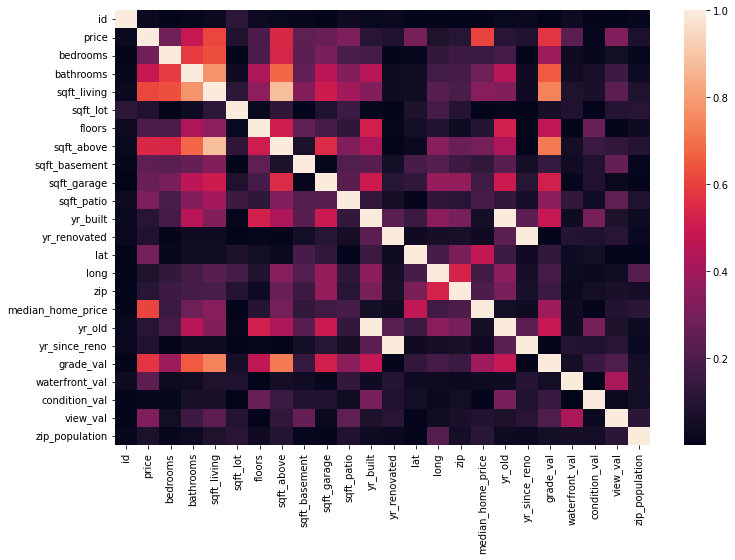

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()));

In [37]:
# creating interactions for variables that have similar affects on price based on the heatmap above
df['sqft_living_x_above'] = df['sqft_living']*df['sqft_above']
df['grade_x_price'] = df['grade_val']*df['median_home_price']

In [38]:
df['median_zip_income'] = df['median_zip_income'].astype(float)

In [39]:
# adding in the distance from a central location in Seattle - I chose Pike Place here.
import haversine as hs
dist_pike = []
pike = (47.6090, -122.3406)
for index, row in df.iterrows():
    dist_pike.append(hs.haversine((df['lat'][index],df['long'][index]),pike))
df['dist_pike'] = dist_pike

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29147 entries, 0 to 30154
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29147 non-null  int64  
 1   date                 29147 non-null  object 
 2   price                29147 non-null  float64
 3   bedrooms             29147 non-null  int64  
 4   bathrooms            29147 non-null  float64
 5   sqft_living          29147 non-null  int64  
 6   sqft_lot             29147 non-null  int64  
 7   floors               29147 non-null  float64
 8   waterfront           29147 non-null  object 
 9   greenbelt            29147 non-null  object 
 10  nuisance             29147 non-null  object 
 11  view                 29147 non-null  object 
 12  condition            29147 non-null  object 
 13  grade                29147 non-null  object 
 14  heat_source          29147 non-null  object 
 15  sewer_system         29147 non-null 

In [41]:
df['zip'] = df['zip'].astype(str)

In [42]:
# creating column indicating if the zip code where the house resides has a Whole Foods Market
zips_with_whole_foods = ['98116', '98122', '98119', '98121', '98115', '98034', '98004', '98052']
df['zip_has_wh'] = np.where(df['zip'].str.contains('98116|98122|98119|98121|98115|98034|98004|98052'), 1, 0)

In [43]:
# creating dummies for grade
dummies = pd.get_dummies(df['grade']) 
df = pd.concat([df, dummies], axis=1)

In [44]:
y = df['price']
X = df[['sqft_living_x_above', 'sqft_living', 'bathrooms', 'bedrooms', 'lat', 'grade_x_price', 'waterfront_val', 'view_val', 'yr_old', 
        'median_zip_income', 'zip_population', 'dist_pike', 'zip_has_wh', '11 Excellent', '12 Luxury', '13 Mansion', 
         '5 Fair', '6 Low Average', '8 Good']]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     3273.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        09:37:19   Log-Likelihood:            -4.2418e+05
No. Observations:               29147   AIC:                         8.484e+05
Df Residuals:                   29127   BIC:                         8.486e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.346e+07   1.48e+06     -9.104      0.000   -1.64e+07   -1.06e+07
sqft_living_x_above     0.0289      0.002     18.501      0.000       0.026       0.032
sqft_living           141.3304      9.634     14.670      0.000     122.447     160.213
bathrooms            5.838e+04   5941.263      9.826      0.000    4.67e+04       7e+04
bedrooms            -2.022e+04   4255.017     -4.752      0.000   -2.86e+04   -1.19e+04
lat                  2.826e+05   3.11e+04      9.089      0.000    2.22e+05    3.43e+05
grade_x_price           0.0973      0.001     82.992      0.000       0.095       0.100
waterfront_val       9.245e+05   2.52e+04     36.656      0.000    8.75e+05    9.74e+05
view_val              1.04e+05   4046.952     25.693      0.000     9.6e+04    1.12e+05
yr_old               1173.6123    121.957      9.623      0.000     934.572    1412.653
median_zip_income      -1.5789      0.145    -10.902      0.000      -1.863      -1.295
zip_population          1.0373      0.250      4.151      0.000       0.547       1.527
dist_pike           -5204.3741    395.103    -13.172      0.000   -5978.794   -4429.954
zip_has_wh           5.601e+04   1.08e+04      5.200      0.000    3.49e+04    7.71e+04
11 Excellent         3.962e+05   2.83e+04     13.980      0.000    3.41e+05    4.52e+05
12 Luxury            9.887e+05   5.05e+04     19.592      0.000     8.9e+05    1.09e+06
13 Mansion           2.267e+06   1.13e+05     20.081      0.000    2.05e+06    2.49e+06
5 Fair               1.255e+05   2.71e+04      4.635      0.000    7.24e+04    1.79e+05
6 Low Average        8.039e+04   1.14e+04      7.048      0.000     5.8e+04    1.03e+05
8 Good              -4.622e+04   6893.163     -6.706      0.000   -5.97e+04   -3.27e+04
==============================================================================
Omnibus:                    50172.255   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        228103924.891
Skew:                          11.386   Prob(JB):                         0.00
Kurtosis:                     435.787   Cond. No.                     5.37e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""